Total Investment Growth

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


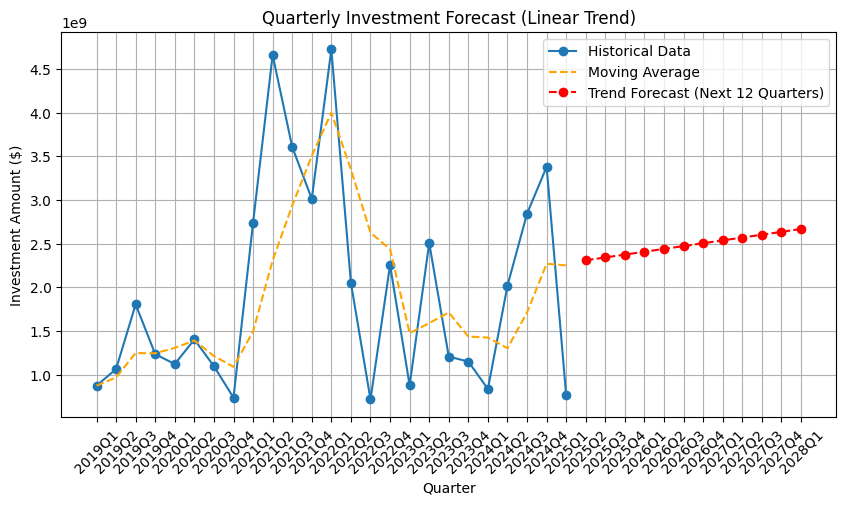

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount"])
df["year_quarter"] = df["date"].dt.to_period("Q")
quarterly_investment = df.groupby("year_quarter")["amount"].sum().reset_index()

quarterly_investment["Moving_Avg"] = quarterly_investment["amount"].rolling(window=4, min_periods=1).mean()
quarterly_investment["quarter_index"] = np.arange(len(quarterly_investment))

X = quarterly_investment[["quarter_index"]]
y = quarterly_investment["Moving_Avg"]
model = LinearRegression().fit(X, y)

forecast_steps = 12
future_quarters = [str(quarterly_investment["year_quarter"].iloc[-1] + i) for i in range(1, forecast_steps + 1)]
future_index = np.arange(len(quarterly_investment), len(quarterly_investment) + forecast_steps).reshape(-1, 1)

forecast_values = model.predict(future_index)

# plot 
plt.figure(figsize=(10, 5))
plt.plot(quarterly_investment["year_quarter"].astype(str), quarterly_investment["amount"], label="Historical Data", marker="o", linestyle="-")
plt.plot(quarterly_investment["year_quarter"].astype(str), quarterly_investment["Moving_Avg"], label="Moving Average", linestyle="dashed", color="orange")
plt.plot(future_quarters, forecast_values, label="Trend Forecast (Next 12 Quarters)", linestyle="dashed", marker="o", color="red")
plt.xlabel("Quarter")
plt.ylabel("Investment Amount ($)")
plt.title("Quarterly Investment Forecast (Linear Trend)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Funding Stage Trends

/var/folders/_5/fg_6jcjj6991gphz5_y_wwnc0000gn/T/ipykernel_79233/476423329.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_size = df.groupby(["year", "deal_category"])["amount"].mean().unstack()
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yanajakhwal/Desktop/Projects/cxc25/env3

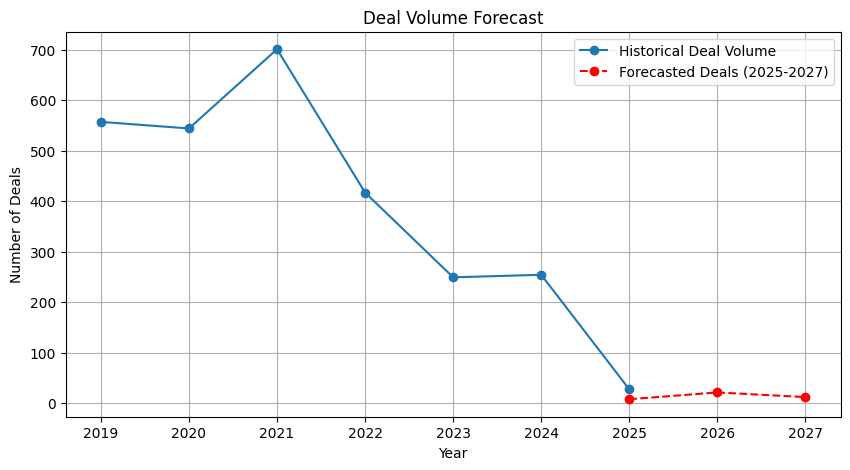

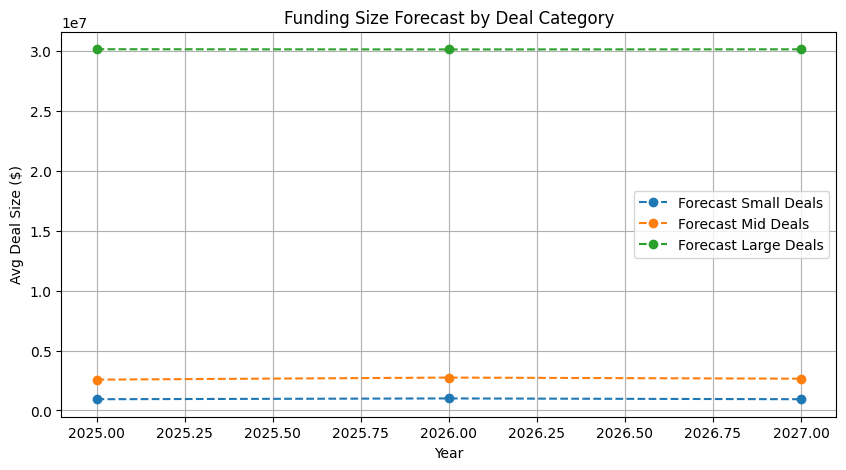

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount"])
df["year"] = df["date"].dt.year
yearly_deals = df.groupby("year").size().reset_index(name="deal_count")
df["deal_category"] = pd.cut(df["amount"], 
                             bins=[100000, 1e6, 10e6, 100e6, np.inf],
                             labels=["Small", "Mid", "Large", "Mega"])
yearly_avg_size = df.groupby(["year", "deal_category"])["amount"].mean().unstack()

merged_df = yearly_deals.merge(yearly_avg_size, on="year", how="left")
forecast_steps = 3
future_years = list(range(2025, 2025 + forecast_steps))

deal_model = ARIMA(merged_df["deal_count"].dropna(), order=(1, 1, 1))
deal_model_fit = deal_model.fit()
deal_forecast = deal_model_fit.forecast(steps=forecast_steps)

forecast_results = {}

for category in ["Small", "Mid", "Large"]:
    if category in merged_df.columns and merged_df[category].dropna().shape[0] > 5:  # Ensure enough data
        model = ARIMA(merged_df[category].dropna(), order=(1, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=forecast_steps)
        forecast_results[category] = forecast

plt.figure(figsize=(10, 5))
plt.plot(merged_df["year"], merged_df["deal_count"], label="Historical Deal Volume", marker="o", linestyle="-")
plt.plot(future_years, deal_forecast, label="Forecasted Deals (2025-2027)", linestyle="dashed", marker="o", color="red")

plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Deal Volume Forecast")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
for category, forecast in forecast_results.items():
    plt.plot(future_years, forecast, label=f"Forecast {category} Deals", linestyle="dashed", marker="o")

plt.xlabel("Year")
plt.ylabel("Avg Deal Size ($)")
plt.title("Funding Size Forecast by Deal Category")
plt.legend()
plt.grid()
plt.show()

/var/folders/_5/fg_6jcjj6991gphz5_y_wwnc0000gn/T/ipykernel_79233/392423394.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deal_size_trends = df.groupby(["year", "deal_category"])["amount"].mean().unstack()
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


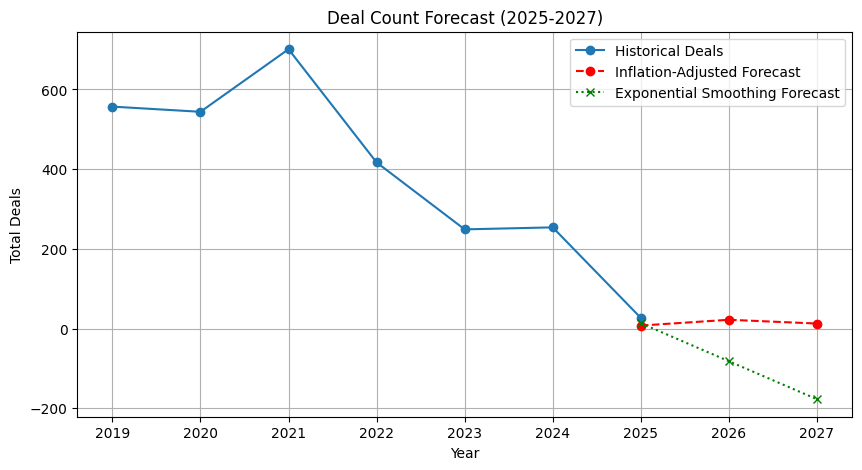

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/U

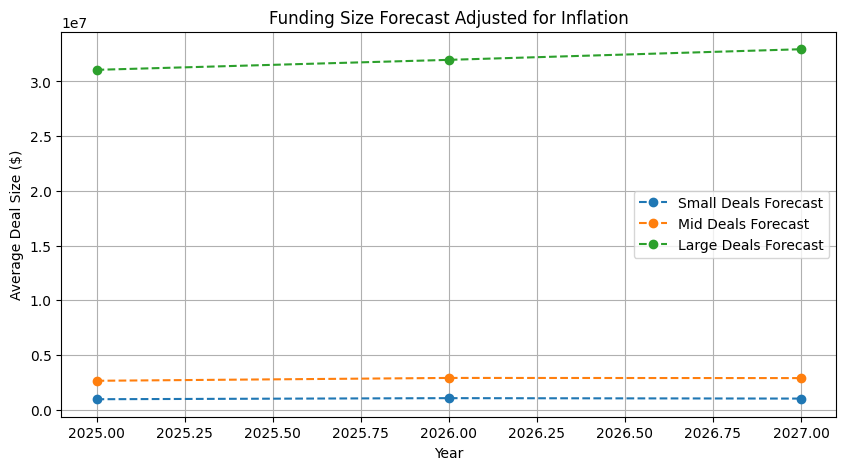

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv("data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount"])
df["year"] = df["date"].dt.year

deal_counts = df.groupby("year").size().reset_index(name="deal_count")
df["deal_category"] = pd.cut(
    df["amount"],
    bins=[100000, 1e6, 10e6, 100e6, np.inf],
    labels=["Small", "Mid", "Large", "Mega"]
)

deal_size_trends = df.groupby(["year", "deal_category"])["amount"].mean().unstack()
deal_count_model = ARIMA(deal_counts["deal_count"], order=(1, 1, 1))
deal_count_fit = deal_count_model.fit()
future_deal_counts = deal_count_fit.forecast(steps=3)

inflation_rate = 0.03  # Can be adjusted dynamically
adjusted_forecast = future_deal_counts * (1 + inflation_rate) ** np.arange(1, 4)

exp_model = ExponentialSmoothing(deal_counts["deal_count"], trend="add", seasonal=None)
exp_fit = exp_model.fit()
exp_forecast = exp_fit.forecast(steps=3)

future_years = [2025, 2026, 2027]

plt.figure(figsize=(10, 5))
plt.plot(deal_counts["year"], deal_counts["deal_count"], label="Historical Deals", marker="o")
plt.plot(future_years, adjusted_forecast, label="Inflation-Adjusted Forecast", linestyle="dashed", marker="o", color="red")
plt.plot(future_years, exp_forecast, label="Exponential Smoothing Forecast", linestyle="dotted", marker="x", color="green")

plt.xlabel("Year")
plt.ylabel("Total Deals")
plt.title("Deal Count Forecast (2025-2027)")
plt.legend()
plt.grid()
plt.show()

deal_size_forecast = {}
for category in ["Small", "Mid", "Large"]:
    if category in deal_size_trends.columns:
        model = ARIMA(deal_size_trends[category].dropna(), order=(1, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=3)
        deal_size_forecast[category] = forecast * ((1 + inflation_rate) ** np.arange(1, 4))  # Adjust for inflation

plt.figure(figsize=(10, 5))
for category, forecast in deal_size_forecast.items():
    plt.plot(future_years, forecast, label=f"{category} Deals Forecast", linestyle="dashed", marker="o")

plt.xlabel("Year")
plt.ylabel("Average Deal Size ($)")
plt.title("Funding Size Forecast Adjusted for Inflation")
plt.legend()
plt.grid()
plt.show()

Funding Stages Forecast

In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount", "roundType"])
df["year"] = df["date"].dt.year

funding_stage_trends = df.groupby(["year", "roundType"]).size().unstack().fillna(0)

forecast_steps = 3  # Predict 3 years ahead
future_years = [2025, 2026, 2027]
stage_forecast = {}

for stage in funding_stage_trends.columns:
    model = ARIMA(funding_stage_trends[stage], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_steps)
    stage_forecast[stage] = forecast

X = funding_stage_trends.index.values.reshape(-1, 1)  # Year as input
stage_probabilities = {}

for stage in funding_stage_trends.columns:
    y = funding_stage_trends[stage].values
    log_model = LogisticRegression()
    log_model.fit(X, y)
    future_X = np.array(future_years).reshape(-1, 1)
    prob_forecast = log_model.predict_proba(future_X)[:, 1]  # Probability of stage growth
    stage_probabilities[stage] = prob_forecast * max(y)  # Scale to deal volume

fig = go.Figure()

for stage in funding_stage_trends.columns:
    fig.add_trace(go.Scatter(
        x=funding_stage_trends.index,
        y=funding_stage_trends[stage],
        mode="lines+markers",
        name=f"Historical {stage} Deals"
    ))

for stage, forecast in stage_forecast.items():
    fig.add_trace(go.Scatter(
        x=future_years,
        y=forecast,
        mode="lines+markers",
        name=f"ARIMA Forecast {stage}",
        line=dict(dash="dash")
    ))

for stage, prob_forecast in stage_probabilities.items():
    fig.add_trace(go.Scatter(
        x=future_years,
        y=prob_forecast,
        mode="lines+markers",
        name=f"Logistic Forecast {stage}",
        line=dict(dash="dot")
    ))

fig.update_layout(
    legend=dict(
        title="Funding Stages",
        x=1,  # Position legend outside the plot
        y=1,
        xanchor="left",
        yanchor="top"
    )
)

# Show Interactive Graph
fig.show()

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yanajakhw

Sectoral Trends

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels

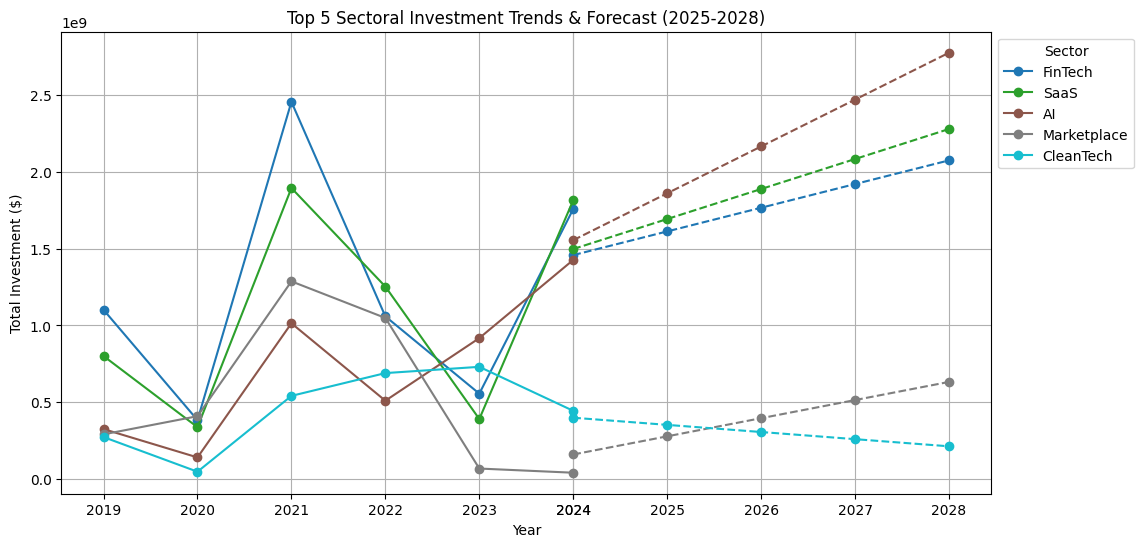

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount", "primaryTag"])
df["year"] = df["date"].dt.year

df = df[df["year"] <= 2024]

sector_trends = df.groupby(["year", "primaryTag"])["amount"].sum().unstack().fillna(0)

top_5_sectors = sector_trends.sum().nlargest(5).index  # Get top 5 sector names
sector_trends = sector_trends[top_5_sectors]  # Filter only the top 5 sectors

sector_trends = sector_trends.interpolate(method="linear", axis=0)

forecast_steps = 5
future_years = list(range(2024, 2024 + forecast_steps))  # Forecast from 2025-2029

sector_forecast = {}

from statsmodels.tsa.holtwinters import ExponentialSmoothing

for sector in sector_trends.columns:
    series = sector_trends[sector]
    try:
        model = ExponentialSmoothing(series.dropna(), trend="add", seasonal=None)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=forecast_steps)
    except:
        print(f"⚠️ ETS failed for {sector}, switching to Linear Regression")
        X = np.array(series.dropna().index).reshape(-1, 1)
        y = series.dropna().values
        lin_model = LinearRegression().fit(X, y)
        forecast = lin_model.predict(np.array(future_years).reshape(-1, 1))

    sector_forecast[sector] = forecast
    
plt.figure(figsize=(12, 6))

colors = plt.cm.get_cmap("tab10", len(sector_trends.columns))  # Assign colors

for i, sector in enumerate(sector_trends.columns):
    color = colors(i)  # Get color from colormap
    plt.plot(sector_trends.index, sector_trends[sector], label=sector, marker="o", color=color)
    plt.plot(future_years, sector_forecast[sector], linestyle="dashed", marker="o", color=color)  # Forecast

plt.xlabel("Year")
plt.ylabel("Total Investment ($)")
plt.title("Top 5 Sectoral Investment Trends & Forecast (2025-2028)")
plt.xticks(list(sector_trends.index) + future_years)
plt.legend(title="Sector", loc="upper left", bbox_to_anchor=(1, 1))  # Single legend entry per sector
plt.grid()
plt.show()

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No s

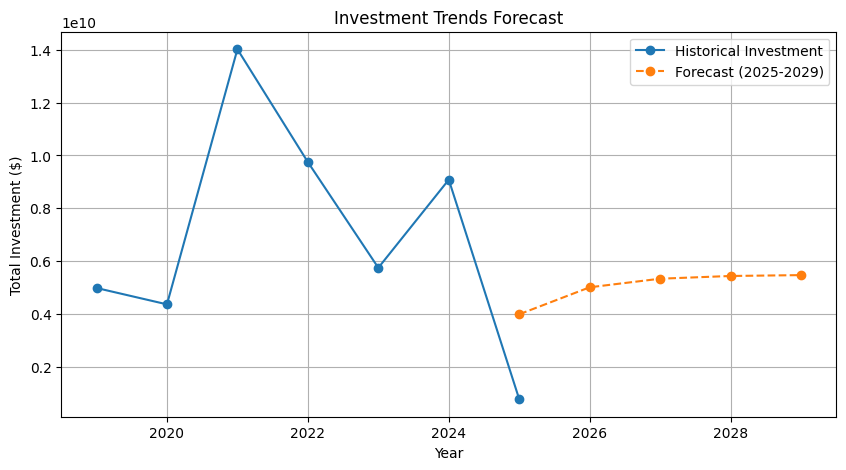

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible s

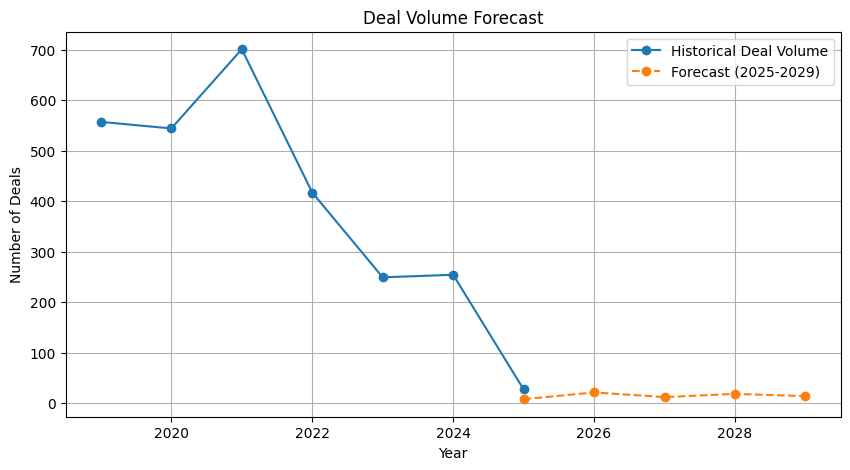

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No s

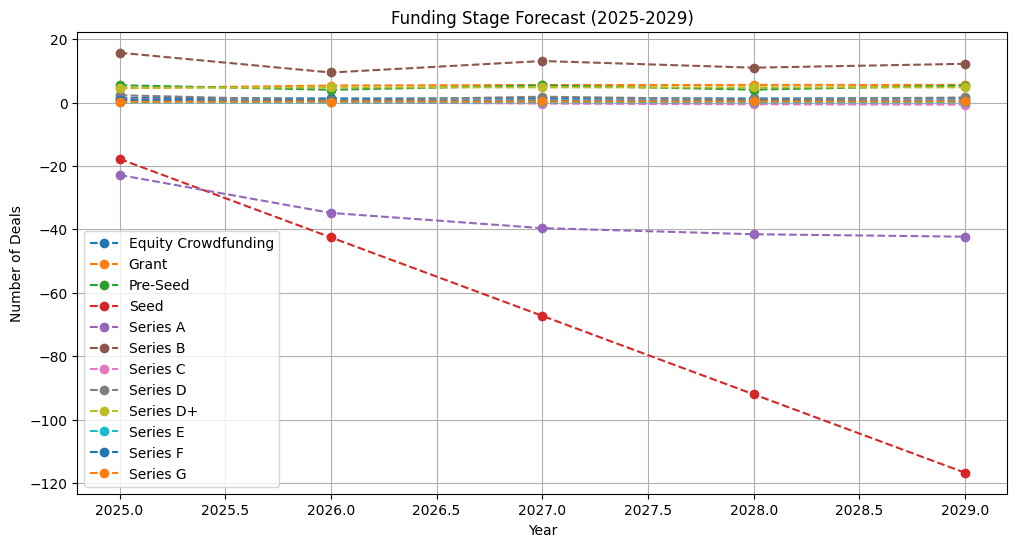

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No s

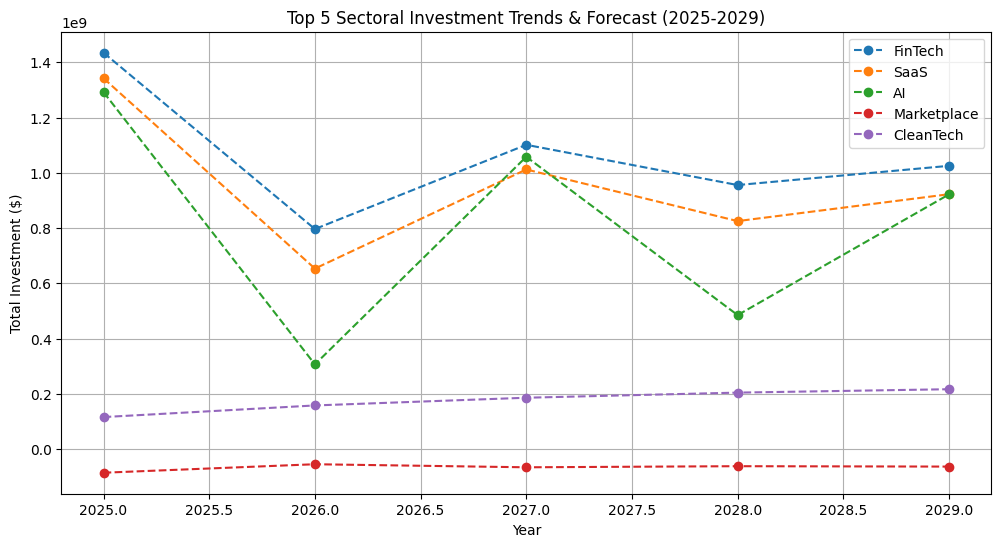

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

deals_df = pd.read_csv("data/deals_updated.csv")
investors_df = pd.read_csv("data/investors_updated.csv")
companies_df = pd.read_csv("data/companies_updated.csv")
dealInvestor_df = pd.read_csv("data/dealInvestor_updated.csv")

deals_df["date"] = pd.to_datetime(deals_df["date"], errors="coerce")
deals_df = deals_df.dropna(subset=["date", "amount"])
deals_df["year"] = deals_df["date"].dt.year

investment_trends = deals_df.groupby("year")["amount"].sum().reset_index()

def forecast_series(series, future_years=5):
    series = series.dropna()
    if len(series) < 5:
        X = np.array(series.index).reshape(-1, 1)
        y = series.values
        lin_model = LinearRegression().fit(X, y)
        future = np.array(range(series.index[-1] + 1, series.index[-1] + 1 + future_years)).reshape(-1, 1)
        return lin_model.predict(future)
    else:
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()
        return model_fit.forecast(steps=future_years)

future_years = list(range(2025, 2025 + 5))
investment_forecast = forecast_series(investment_trends.set_index("year")["amount"], future_years=5)

plt.figure(figsize=(10, 5))
plt.plot(investment_trends["year"], investment_trends["amount"], marker="o", label="Historical Investment")
plt.plot(future_years, investment_forecast, marker="o", linestyle="dashed", label="Forecast (2025-2029)")
plt.xlabel("Year")
plt.ylabel("Total Investment ($)")
plt.title("Investment Trends Forecast")
plt.legend()
plt.grid()
plt.show()

deal_volume = deals_df.groupby("year").size().reset_index(name="deal_count")
deal_volume_forecast = forecast_series(deal_volume.set_index("year")["deal_count"], future_years=5)

plt.figure(figsize=(10, 5))
plt.plot(deal_volume["year"], deal_volume["deal_count"], marker="o", label="Historical Deal Volume")
plt.plot(future_years, deal_volume_forecast, marker="o", linestyle="dashed", label="Forecast (2025-2029)")
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Deal Volume Forecast")
plt.legend()
plt.grid()
plt.show()

if "roundType" in deals_df.columns:
    funding_stage_trends = deals_df.groupby(["year", "roundType"]).size().unstack().fillna(0)
    funding_forecast = {}
    
    for stage in funding_stage_trends.columns:
        funding_forecast[stage] = forecast_series(funding_stage_trends[stage], future_years=5)
    
    plt.figure(figsize=(12, 6))
    for stage in funding_forecast:
        plt.plot(future_years, funding_forecast[stage], linestyle="dashed", marker="o", label=stage)
    
    plt.xlabel("Year")
    plt.ylabel("Number of Deals")
    plt.title("Funding Stage Forecast (2025-2029)")
    plt.legend()
    plt.grid()
    plt.show()

if "primaryTag" in deals_df.columns:
    sector_trends = deals_df.groupby(["year", "primaryTag"])["amount"].sum().unstack().fillna(0)
    top_sectors = sector_trends.sum().sort_values(ascending=False).head(5).index
    sector_forecast = {}
    
    for sector in top_sectors:
        sector_forecast[sector] = forecast_series(sector_trends[sector], future_years=5)
    
    plt.figure(figsize=(12, 6))
    for sector in sector_forecast:
        plt.plot(future_years, sector_forecast[sector], linestyle="dashed", marker="o", label=sector)
    
    plt.xlabel("Year")
    plt.ylabel("Total Investment ($)")
    plt.title("Top 5 Sectoral Investment Trends & Forecast (2025-2029)")
    plt.legend()
    plt.grid()
    plt.show()


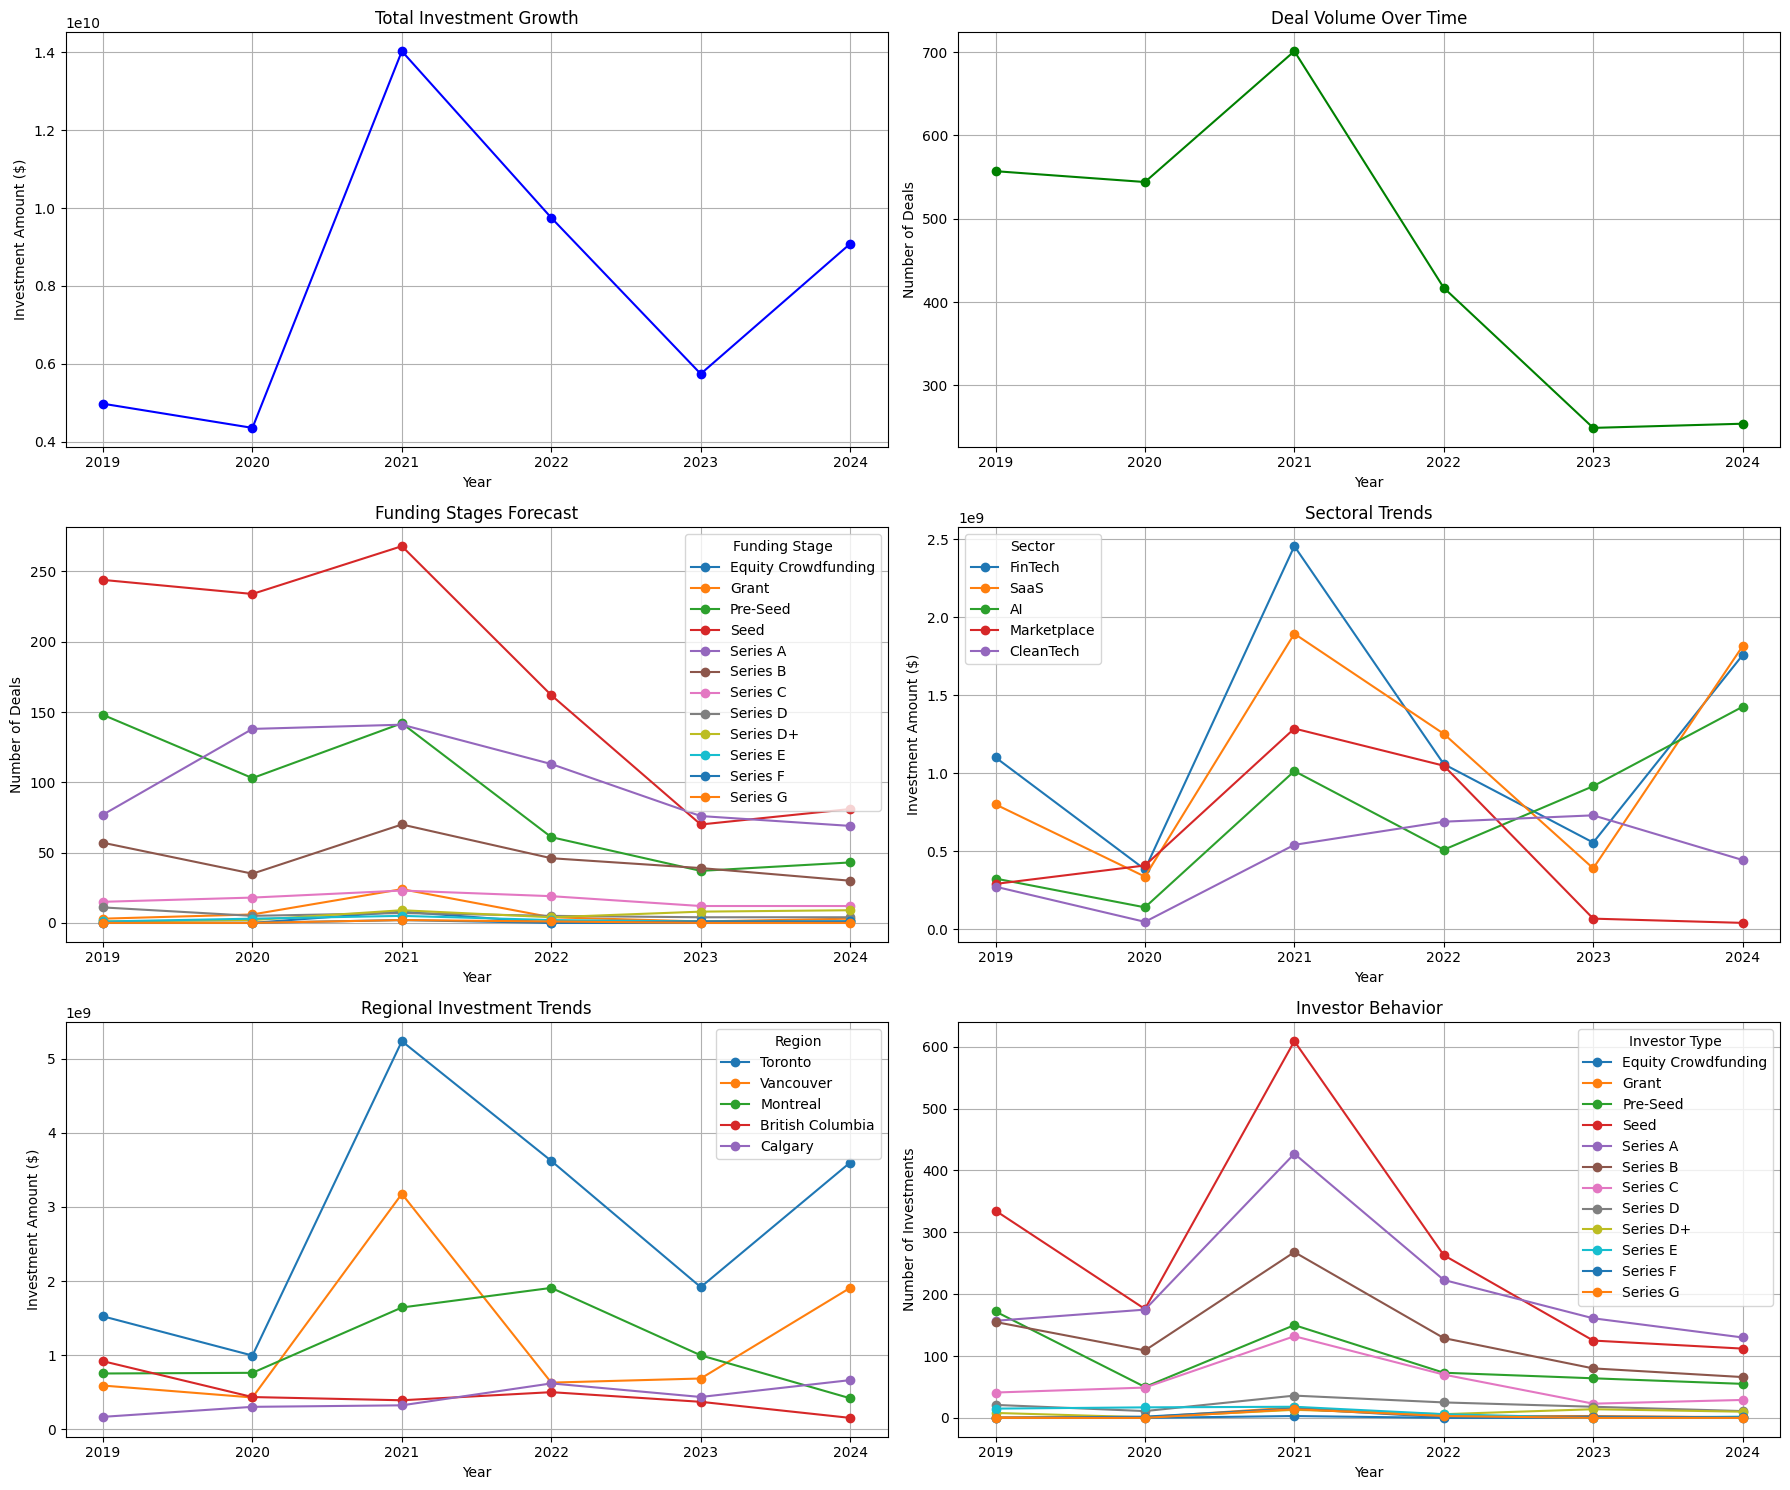

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import seaborn as sns

deals_df = pd.read_csv("data/deals_updated.csv")
investors_df = pd.read_csv("data/investors_updated.csv")
companies_df = pd.read_csv("data/companies_updated.csv")
deal_investor_df = pd.read_csv("data/dealInvestor_updated.csv")

deals_df["date"] = pd.to_datetime(deals_df["date"], errors="coerce")
deals_df["year"] = deals_df["date"].dt.year
deals_df = deals_df[deals_df["year"] <= 2024]
deal_investor_df = deal_investor_df[deal_investor_df["year"] <= 2024]

# 1. Total Investment Growth
total_investment = deals_df.groupby("year")["amount"].sum()

# 2. Deal Volume & Funding Size Trends
deal_volume = deals_df.groupby("year").size()
funding_size_trends = deals_df.groupby(["year", "amount"]).size().unstack(fill_value=0)

# 3. Funding Stages Forecast
funding_stages = deals_df.groupby(["year", "roundType"]).size().unstack(fill_value=0)

# 4. Sectoral Trends
sector_trends = deals_df.groupby(["year", "primaryTag"])["amount"].sum().unstack(fill_value=0)
top_5_sectors = sector_trends.sum().nlargest(5).index
sector_trends = sector_trends[top_5_sectors]

# 5. Regional Investment Trends
regional_trends = deals_df.groupby(["year", "headquarters"])["amount"].sum().unstack(fill_value=0)
top_5_regions = regional_trends.sum().nlargest(5).index
regional_trends = regional_trends[top_5_regions]

# 6. Investor Behavior
investor_behavior = deal_investor_df.groupby(["year", "roundType"]).size().unstack(fill_value=0)

# 7. High-Growth Startup Predictions
top_startups = deals_df.groupby("companyName")["amount"].sum().nlargest(10)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# 1. Total Investment Growth
axes[0, 0].plot(total_investment.index, total_investment.values, marker="o", linestyle="-", color="b")
axes[0, 0].set_title("Total Investment Growth")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Investment Amount ($)")
axes[0, 0].grid()

# 2. Deal Volume & Funding Size Trends
axes[0, 1].plot(deal_volume.index, deal_volume.values, marker="o", linestyle="-", color="g")
axes[0, 1].set_title("Deal Volume Over Time")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Number of Deals")
axes[0, 1].grid()

# 3. Funding Stages Forecast
funding_stages.plot(ax=axes[1, 0], marker="o", linestyle="-")
axes[1, 0].set_title("Funding Stages Forecast")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Number of Deals")
axes[1, 0].legend(title="Funding Stage")
axes[1, 0].grid()

# 4. Sectoral Trends
sector_trends.plot(ax=axes[1, 1], marker="o", linestyle="-")
axes[1, 1].set_title("Sectoral Trends")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Investment Amount ($)")
axes[1, 1].legend(title="Sector")
axes[1, 1].grid()

# 5. Regional Investment Trends
regional_trends.plot(ax=axes[2, 0], marker="o", linestyle="-")
axes[2, 0].set_title("Regional Investment Trends")
axes[2, 0].set_xlabel("Year")
axes[2, 0].set_ylabel("Investment Amount ($)")
axes[2, 0].legend(title="Region")
axes[2, 0].grid()

# 6. Investor Behavior
investor_behavior.plot(ax=axes[2, 1], marker="o", linestyle="-")
axes[2, 1].set_title("Investor Behavior")
axes[2, 1].set_xlabel("Year")
axes[2, 1].set_ylabel("Number of Investments")
axes[2, 1].legend(title="Investor Type")
axes[2, 1].grid()

plt.tight_layout()
plt.show()
